In [138]:
NEED_TO_INSTALL_PACKAGES = False
if NEED_TO_INSTALL_PACKAGES:
    ! pip install bilby lalsimulation lalsuite
    
import bilby

In [139]:
from bilby.gw import conversion

#calculate the chirp mass from the component masses
chirp_mass = conversion.component_masses_to_chirp_mass(mass_1=95.3, mass_2=69)
print(chirp_mass)

70.41054114621497


In [140]:
POSSIBLE_KEYS = bilby.gw.prior.BBHPriorDict(aligned_spin=True).keys()
print(POSSIBLE_KEYS)

15:44 bilby INFO    : Using aligned spin prior
15:44 bilby INFO    : No prior given, using default BBH priors in /home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


dict_keys(['mass_1', 'mass_2', 'mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'chi_1', 'chi_2'])


In [141]:
### LET US SETUP SOME INJECTION PARAMETERS
injection_parameters = dict(
    mass_1 = 95.3,
    mass_2 = 69.0,
    mass_ratio = 69.0/95.3, #m2/m1
    chirp_mass = 114.8,
    chi_1 = 0.2,
    chi_2 = 0.3,
    luminosity_distance = 3920,
    theta_jn = 1.4,
    psi = 2.0,
    ra = 1.375,
    dec = -0.7,
    phase = 1.2,
    geocent_time = 100,
)

In [142]:
waveform_arguments = dict(
    waveform_approximant = 'IMRPhenomPv2',
    reference_frequency = 50,
    minimum_frequency = 20,
    sampling_frequency = 1024,
    duration = 4,
    start_time = injection_parameters['geocent_time'] - 2,
)

In [143]:
waveform_generator = bilby.gw.WaveformGenerator(
    duration = waveform_arguments['duration'],
    sampling_frequency = waveform_arguments['sampling_frequency'],
    frequency_domain_source_model = bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments = waveform_arguments,
)

15:44 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


15:44 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 4, 'start_time': 98}



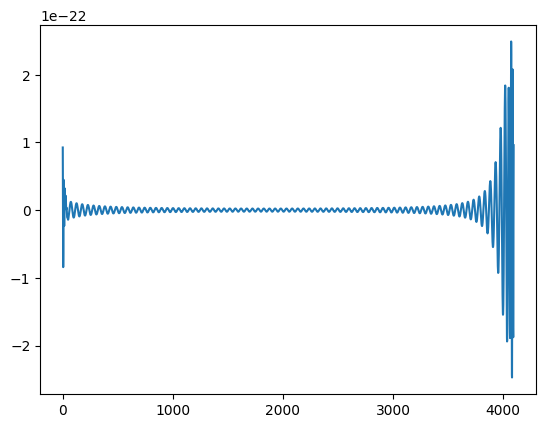

In [144]:
import matplotlib.pyplot as plt
plt.plot(waveform_generator.time_domain_strain(injection_parameters)['plus'])

In [145]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
ifos_00 = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])

ifos.set_strain_data_from_power_spectral_densities(sampling_frequency=waveform_arguments['sampling_frequency'], 
                                                   duration=waveform_arguments['duration'], 
                                                   start_time=waveform_arguments['start_time'])

ifos_00.set_strain_data_from_zero_noise(sampling_frequency=waveform_arguments['sampling_frequency'],
                                        duration=waveform_arguments['duration'], 
                                        start_time=waveform_arguments['start_time'])

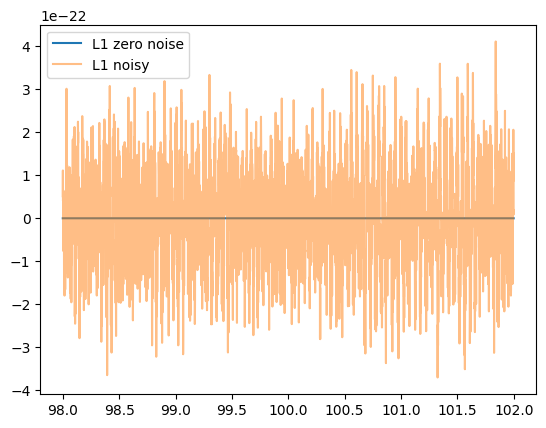

In [146]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

In [147]:
ifos.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

ifos_00.inject_signal(
    parameters=injection_parameters,
    waveform_generator=waveform_generator,
)

15:44 bilby WARNING : There are unused waveform kwargs. This is deprecated behavior and will
result in an error in future releases. Make sure all of the waveform kwargs are correctly
spelled.

Unused waveform_kwargs: {'sampling_frequency': 1024, 'duration': 4, 'start_time': 98}



15:44 bilby INFO    : Injected signal in H1:
15:44 bilby INFO    :   optimal SNR = 5.51
15:44 bilby INFO    :   matched filter SNR = 7.36+0.31j
15:44 bilby INFO    :   mass_1 = 95.3
15:44 bilby INFO    :   mass_2 = 69.0
15:44 bilby INFO    :   mass_ratio = 0.7240293809024134
15:44 bilby INFO    :   chirp_mass = 114.8
15:44 bilby INFO    :   chi_1 = 0.2
15:44 bilby INFO    :   chi_2 = 0.3
15:44 bilby INFO    :   luminosity_distance = 3920
15:44 bilby INFO    :   theta_jn = 1.4
15:44 bilby INFO    :   psi = 2.0
15:44 bilby INFO    :   ra = 1.375
15:44 bilby INFO    :   dec = -0.7
15:44 bilby INFO    :   phase = 1.2
15:44 bilby INFO    :   geocent_time = 100
15:44 bilby INFO    : Injected signal in L1:
15:44 bilby INFO    :   optimal SNR = 3.04
15:44 bilby INFO    :   matched filter SNR = 2.97-0.04j
15:44 bilby INFO    :   mass_1 = 95.3
15:44 bilby INFO    :   mass_2 = 69.0
15:44 bilby INFO    :   mass_ratio = 0.7240293809024134
15:44 bilby INFO    :   chirp_mass = 114.8
15:44 bilby INFO 

[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j], shape=(2049,)),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j], shape=(2049,))},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j], shape=(2049,)),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j], shape=(2049,))},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j], shape=(2049,)),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j], shape=(2049,))}]

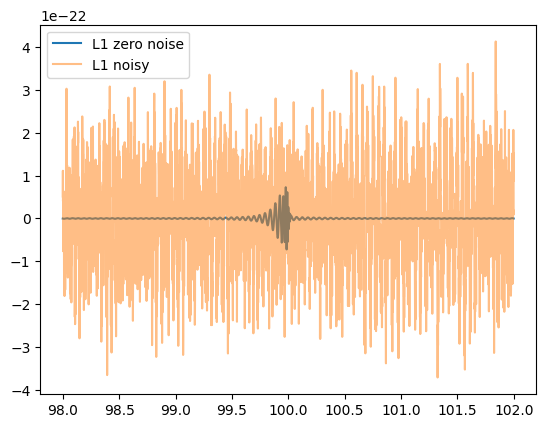

In [148]:
plt.plot(ifos_00[1].time_array, ifos_00[1].time_domain_strain, label='L1 zero noise')
plt.plot(ifos[1].time_array, ifos[1].time_domain_strain, label='L1 noisy', alpha=0.5)
plt.legend()

$p(\theta|d) = \dfrac{\mathcal{L}(d|\theta) p(\theta)}{\mathcal{Z(d)}}$

In [149]:
priors = bilby.gw.prior.BBHPriorDict(aligned_spin=True)
priors['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=50, maximum=150)
priors

15:44 bilby INFO    : Using aligned spin prior
15:44 bilby INFO    : No prior given, using default BBH priors in /home/naga203/anaconda3/envs/grav/lib/python3.11/site-packages/bilby/gw/prior_files/aligned_spins_bbh.prior.


{'mass_1': Constraint(minimum=5, maximum=100, name='mass_1', latex_label='$m_1$', unit=None),
 'mass_2': Constraint(minimum=5, maximum=100, name='mass_2', latex_label='$m_2$', unit=None),
 'mass_ratio': bilby.gw.prior.UniformInComponentsMassRatio(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None, equal_mass=False),
 'chirp_mass': Uniform(minimum=50, maximum=150, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None),
 'luminosity_distance': bilby.gw.prior.UniformSourceFrame(minimum=100.0, maximum=5000.0, cosmology='Planck15', name='luminosity_distance', latex_label='$d_L$', unit='Mpc', boundary=None),
 'dec': Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None),
 'ra': Uniform(minimum=0, maximum=6.283185307179586, name='ra', latex_label='$\\mathrm{RA}$', unit=None, boundary='periodic'),
 'theta_jn': Sine(minimum=0, maximum=3.141592653589793, name='t

In [150]:
keys_of_interest = ['chirp_mass', 'dec']
for key in priors.keys():
    if key not in keys_of_interest:
        priors[key] = injection_parameters[key]

priors['geocent_time'] = injection_parameters['geocent_time']

In [151]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos,
    waveform_generator=waveform_generator,
    priors=priors,
)

In [152]:
result = bilby.core.sampler.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler='dynesty',
    outdir='./outdir',
    label='legends',
    nlive=500,
    resume = False,
)

15:44 bilby INFO    : Running for label 'legends', output will be saved to './outdir'
15:44 bilby INFO    : Using lal version 7.6.1
15:44 bilby INFO    : Using lal git version Branch: None;Tag: lalsuite-v7.25;Id: fafc22fe7c166517798534eeca175f27a66e0138;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
15:44 bilby INFO    : Using lalsimulation version 6.1.0
15:44 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsuite-v7.25;Id: fafc22fe7c166517798534eeca175f27a66e0138;;Builder: Unknown User <>;Repository status: CLEAN: All modifications committed
15:44 bilby INFO    : Analysis priors:
15:44 bilby INFO    : chirp_mass=Uniform(minimum=50, maximum=150, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
15:44 bilby INFO    : dec=Cosine(minimum=-1.5707963267948966, maximum=1.5707963267948966, name='dec', latex_label='$\\mathrm{DEC}$', unit=None, boundary=None)
15:44 bilby INFO    : mass_1=95.3
15:44 bilby INFO    : mas

1it [00:00, ?it/s]

15:45 bilby INFO    : Written checkpoint file ./outdir/legends_resume.pickle
15:45 bilby INFO    : Rejection sampling nested samples to obtain 1095 posterior samples
15:45 bilby INFO    : Sampling time: 0:00:39.968295
15:45 bilby INFO    : Summary of results:
nsamples: 1095
ln_noise_evidence: -5973.806
ln_evidence: -5944.795 +/-  0.104
ln_bayes_factor: 29.010 +/-  0.104



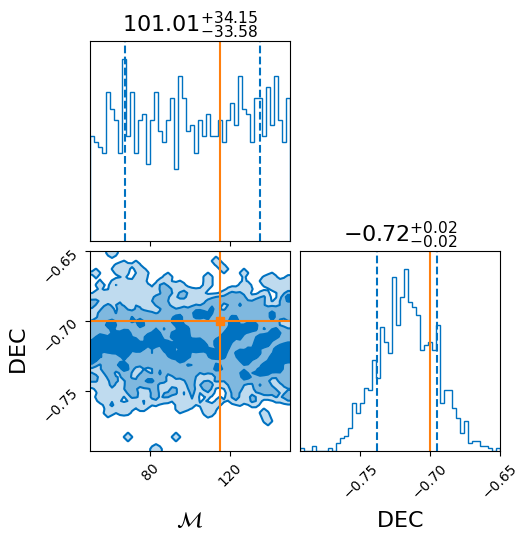

In [153]:
truths = {key:injection_parameters[key] for key in keys_of_interest}
result.plot_corner(truths=truths)